# Abstract

This dissertation investigates real-estate price dynamics by constructing a heterogeneous agent-based model of boundedly rational agents. The model accounts for pricing strategies based on past market fundamentals and past price development with agents altering behaviour according to a social dynamic. The behaviour of the model is examined with respect to various parameters and reveal that real-estate price instability depends crucially on features that characterize different types of real-estate. In addition, the effectiveness and limitations of several price reduction policies are assessed through simulations. The results suggest that policies which increase the elasticity of supply result in desirable market fundamentals and a trade-off in terms of increased real-estate price volatility. In contrast, policies increasing the elasticity of demand and interest rate yield a more stable real-estate market, although with less desirable market fundamental outcomes. These insights inform policymakers of critical features and tradeoffs to account for when addressing the real-estate market's price volatility.

See Dissertation_Ostring_2020.pdf for the comprehensive dissertation which includes a literature review, full explanation of the model, experimentation layout, discussion and full reference. This jupyter notebook file includes the mathematical foundation of the model as well as the code and results of some experiments. Please read this file in conjunction with Dissertation_Ostring_2020.pdf

# The Model

In the benchmark model, demand for rental property is a dynamic function of a demand constant ($\alpha_{1}$), current exogenous demand of real estate ($E_{t}$), current rental level ($R_{t}$) and the demand elasticity ($\varepsilon$) described by Equation 1:

1) $ D_{t} = \alpha_{1}E_{t}R_t^{-\varepsilon} $

It is assumed that the market clears by rents adjusting until demand of rental property equals supply ($D_{t}=S_{t}$). Hence, this leads to the following relationship:

2) $ R_{t} = \left( \frac{S_{t}}{\alpha_{1}E_{t}} \right)^{\frac{1}{-\varepsilon}}  $

Naturally, the rent level is increasing in the exogenous demand variable and decreasing in the stock of real-estate. The stock of space evolves according to the difference equation below. Depreciation occurs at a constant rate ($\delta$) and the flow of new real-estate ($C_{t-n}$) is the level of construction initiated $n$ periods ago, where $n$ is the construction supply lag characterising time required for construction and project planning.

3) $ \frac{S_{t}}{S_{t-1}} = 1 - \delta +  \frac{C_{t-n}}{S_{t-1}} $

Therefore, the ratio of the current stock of real-estate to the last period is decreasing in the depreciation rate and increasing in the new realized flow of construction relative to last period’s stock of property. The latter ratio is determined by the forecasted real-estate price for the time period when construction would be completed ($P_{t}$), a supply constant ($\alpha_{2}$) and the price elasticity of supply ($\eta$):

4) $ \frac{C_{t-n}}{S_{t-1}} = \alpha_{2}P_{t}^{\eta} $

The ratio of new construction is increasing in the forecasted real-estate price. One of the simplest forms of myopic fundamental valuation behaviour is to assume that forecasts of asset prices $n$ periods ahead is a constant capitalization of current rents at the time of the pricing decision (Wheaton 1999, Hendershott and Kane 1995):

5) $ P_{t+n} = \frac{V_{t}}{r}  $

This strategy of real-estate pricing will be referred to as “fundamentalist” henceforth. Such pricing strategy is myopic as it is backward looking and is a classical mistake which generates cobweb cycles (Wheaton 1999).

### First Extension: heterogeneity

I first extend the baseline model by allowing for naïve momentum traders, who value real-estate by projecting the moving average growth rates of the past $m$ periods on the last period’s price. In each period, $t$, momentum traders determine a valuation for that period ($P_{m,t}$) using a moving average growth rate and project prices up until $t+n$:

6) $ P_{m,t} = \left ( \frac{1}{m-1}\sum_{i=1}^{m-1}{\frac{P_{t-i}}{P_{t-i-1}}} \right )P_{t-1} $

Simultaneously, fundamentalists continue to value real-estate for the current period by capitalizing current rents to the current interest rate. At time $t$, fundamentalist compute a valuation for that period ($P_{f,t}$) and project this price up until $t+n$. 

7) $ P_{f,t} = \frac{V_{t}}{r} $

Having extended the baseline model to incorporate heterogeneity in investment strategy, the realized market price of real-estate at time $t$ is now defined to be the sum of the fundamentalist's valuation and momentum trader's valuation weighted by their respective representation in the investor population: 

8) $ P_{t} = \frac{M}{N}P_{m,t}+ \frac{N-M}{N}P_{f,t} $

Where $M$ is the number of momentum traders in the economy and $N$ is the total number of agents.

### Second extension: social dynamic

Next, I introduce the social dynamic through which agents interact and may switch their investment strategy from fundamentalist to momentum trader, or the opposite.
The behaviour switching regime follows an extended version of a stochastic recruitment model which explains the contagion behaviour described in financial markets literature as corresponding to the equilibrium distribution of a stochastic process rather than switching between two multiple equilibria (Kirman 1993). The state of the system is defined as the number momentum trader agents, $M$, amongst a total of $N$ agents, i.e:

9) $ M \in (0,1,...,N)
 $

The system evolves as investors interact in random. If a momentum trader interacts with a fundamentalist, then the probability of converting the fundamentalist to be a momentum trader at time $t$ is  $\rho_{m,t}$ and conversely the probability of converting a momentum trader to become a fundamentalist is $\rho_{f,t}$. There is a probability, $\theta$, that an investor changes their strategy independently before interacting with anyone, which connotes random self-conversion for instance due to the replacement of an existing trader by a new one who may not share necessarily the same view. Dynamic development of the process is then given by the two probabilities below where $P(M,M+1)$ is the probability of an increment of $M$ in a discrete time step and $P(M,M-1)$ is the probability of a decrement. 

10) $ P(M,M+1) = \left (1-\frac{M}{N}\right )\left (\theta + \rho_{m,t}\frac{M}{N-1}\right ) $

11) $ P(M,M-1) = \left (\frac{M}{N}\right )\left (\theta + \rho_{f,t}\frac{N-M}{N-1}\right ) $

I choose $\theta$ to be a small and positive and define $\rho_{f,t} + \rho_{m,t} = a$ where $a$ is a positive constant, as this allows for an increasingly “persuasive” investment strategy to increase the relative probability of converting opposite agents to the respective strategy. For example, in the case that the momentum trading strategy becomes more “persuasive” (indicated by a higher $\rho_{m,t})$, this results in a higher probability of recruiting others to this strategy (increase in $P(M,M+1)$) and a lower probability of losing an agent from the momentum trading strategy to the fundamentalist (decrease in $P(M,M-1)$), since the the sum of $\rho_{m,t}$ and $\rho_{f,t}$ is the constant $a$. I allow for a positive $\theta$ so as not to get “stuck" at $M=0$ or $M=N$. 

To account for a learning process of investors in regards to the past performances of each investment strategy, I use a simplified version of the fitness model suggested by Eichholtz and Huisman 2015. This fitness model yields a relative performance measure ($w_{m,t} \in (0,1)$) which alters the probability of converting a fundamentalist to a momentum trader in an interaction ($\rho_{m,t}$) by the equation:

12) $ \rho_{m,t}=aw_{m,t} $

The following multinomial logit probability determines the relative performance measure of the momentum trading strategy to the fundamentalist strategy ($w_{m,t}$) at time $t$. It includes a sensitivity parameter, $\gamma>0$, and the potential realized gains or losses that an agent would have realized with either strategy at time $t$ ($u_{m,t}$ for the momentum trader and $u_{f,t}$  for the fundamentalist):

13) $ w_{m,t}=\frac{e^{\gamma u_{m,t}}}{e^{\gamma u_{m,t}}+e^{\gamma u_{f,t}}} $

The variable $\gamma$ measures how sensitive the relative performance measure is to differences in realized profits between the two investment strategies. The case $\gamma=0$ corresponds to the situation in which agents do not care about past performances of the strategies, hence these will not change the probabilities of “convincing” others to the respective strategy described earlier in the recruitment model. Conversely, if $\gamma=\infty$, this corresponds to the case in which agents weigh any difference in past performance heavily. Realized gains or losses of a strategy at time $t$ is calculated as the profit or loss that an agent would have obtained over the past $q$ periods having implemented the respective strategy, where $q$ is a memory parameter. Specifically, the realized gain or loss from the momentum trading strategy ($u_{m,t}$) and the fundamentalist strategy ($u_{f,t}$) is given by:

14) $ u_{m,t}=\frac{1}{q-1}\sum_{i=1}^{q-1}\Delta P_{t-i}sgn(\Delta P_{m,t-i}) $

15) $ u_{f,t}=\frac{1}{q-1}\sum_{i=1}^{q-1}\Delta P_{t-i}sgn(\Delta P_{f,t-i}) $

Where $\Delta P_{m,t}$ and $\Delta P_{f,t}$ are the price change forecasts between time $t$ and $t-1$ of the momentum trading strategy and fundamentalist strategy respectively.

The social dynamic thus encourages a larger fraction of the population to subscribe to the more effective investment strategy through the fitness model and, subsequently, through the recruitment model. For example, consider the case that the momentum trading strategy would have yielded superior profits during past $q$ periods. Assuming $\gamma>0$, this would in turn result in the relative performance measure to be greater than $0.5$. Thus, the probability of converting an agent to become a momentum trader ($\rho_{m,t}$) is larger than the probability of converting an agent to become a fundamentalist  ($\rho_{f,t}$) by Equation 12 and 13. The converse is true, if the fundamentalist strategy had outperformed during the relevant memory period.

It is important to note that even if the model encourages agents to shift to the superior strategy, the recruitment model still allows for a contagion affect to take place and price bubbles to form. For instance, the momentum trader strategy valuation may deviate substantially from the fundamentalist’s valuation, but if momentum traders are heavily represented in the population then the realized market price would be closer to the momentum trader’s valuation and strengthen their probability of recruiting others. Therefore, the model allows for “self-fulfilling prophecies” to take place creating drastic deviation from market fundamentals.

### Baseline model activity diagram

![alt text](comprep1.png "Baseline model activity diagram")

### Extension activity diagram

![alt text](comprep2.png "Title")

# Model Code

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
import statsmodels.api as sm
import pandas as pd

In [2]:
class RealEstate:
    """
    Heterogeneous agent-based model of boundedly rational agents.

    Parameters and Variable:
    ------------
    T: scalar
        The current discrete time period
    α_1: scalar
        The Demand constant for property
    E : np.array
        The exogenous demand instrument
    ε: scalar
        Elasticity of demand for housing
    δ : scalar
        Depreciation rate
    n : scalar
        Lag period for construction
    α_2: scalar
        Supply of housing constant
    η: scalar
        Elasticity of supply of housing
    S : np.array
        Contains housing stock levels at each T
    R : np.array
        Contains rent levels at each T       
    P : np.array
        Contains market forecasted asset price levels at each T
    P_f : np.array
        Contains fundamental trader's valuation
    P_m : np.array
        Contains chartists trader's valuation
    m : scalar
        Moving average memory parameter. Periods used to calculate moving average to determine valuation for P_m at a given year
    C : np.array
        Contains construction levels at each T
    T : scalar
        Discrete time unit, starts at 0
    v : scalar
        Share of Mometum Traders. (1-v) is share of Fundamentalists
    q : scalar
        Fitness model memory parameter. Memory parameter used to evaluate past performance.
    y : scalar
        Intensity of choice parameter. Measures how sensitive agents are in selecting optimal strategy
    numAgents : scalar
        The number of agents which have heterogeneous investment strategies
    a : scalar
        Sensitivity parameter that determines the influence that Fitness Model has on Recruitment Modeli
    """
    

    def __init__(self, totalIterations=900, E=np.full(999, 10.0), ε=np.full(999, 0.4), δ=0.05, n=5, 
                 η=np.full(999, 2.0), r=np.full(999, 0.05), T=0, S=np.array([2500.0]), R=np.array([20.0]), P=np.full(999, 400.0), 
                 P_f=np.full(999, 400.0), P_m=np.full(999, 400.0), m=5, C=np.array([]), q=5, initShareFundamental=0.5,
                 w=np.array([0.5]), y=0.1, numAgents=100, a=0.1):
        
        # Initializing variables
        self.totalIterations, self.E, self.ε, self.δ, self.n, self.η, self.r, self.T, self.S, self.R, self.P, self.C, self.P_f, self.P_m, self.m, self.q, self.initShareFundamental, self.w, self.y, self.numAgents, self.a = totalIterations, E, ε, δ, n, η, r, T, S, R, P, C, P_f, P_m, m, q, initShareFundamental, w, y, numAgents, a
        
        
        # Creating the stabele construction level 
        new_C = self.δ*self.S[0]
        self.C = np.append(self.C, new_C)
        
        # Solve for steady state α_2 and α_1  
        self.α_1 = (self.S[0]*(self.R[0]**self.ε[0]))/(self.E[0])
        self.α_2 = (self.C[0]/self.S[0])*(1/(self.P[0]**self.η[0]))
        
        
        # Assuming the past construction levels initiated from T = -n  to T = -1 where equivalent to T=0, 
        # we account for the flow of this, hence S[0] to S[n-1] is already determined. Here we determine up to 
        # S[n-2] and S[n-1] will be determined in first call of the "iteration" methodt
        for i in range(self.n-2):
            new_S = (1-self.δ)*self.S[i] + self.C[0]
            new_R = (new_S/(self.α_1*self.E[1+i]))**(1/-self.ε[1+i])   
            
            self.S = np.append(self.S, new_S)
            self.R = np.append(self.R, new_R)
            
        
        # Setting initial P_m to P_f
        self.P_m[0] = self.P_f[0]
        
        # Create initial population of investors of different investment strategy with even distribution
        self.initAgent = qe.random.draw(np.cumsum((self.initShareFundamental,1-self.initShareFundamental)), self.numAgents)
        self.agentBeliefs = self.initAgent
        self.numMomentum = np.array([sum(self.agentBeliefs)])
        self.v = np.array([self.numMomentum/self.numAgents])
        
        self.T +=1
        
        for i in range(self.totalIterations):
            self.iteration()
            
        
    def iteration(self):
        
        self.update_S()
        self.update_R()
        self.update_Social_Dynamic()
        self.update_P()
        self.update_C()
        
        self.T +=1
        
        
    def update_S(self):
        """
        Updates the np.array containing the Stock levels for each period
        """
        # At time T the previously calculated C[T-1] and S[T+n-3] will determine S[T+n-2]
        new_S = (1-self.δ)*self.S[self.T+self.n-3] + self.C[self.T-1]
        self.S = np.append(self.S, new_S)
            
    def update_R(self):
        """
        Updates the np.array containing the Rent levels for each period
        """ 
        # At time T the previously calculated S[T+n-2] and the exogenous E[T+n-2] determined R[T+n-2]
        new_R = (self.S[self.T+self.n-2]/(self.α_1*self.E[self.T+self.n-2]))**(1/-self.ε[self.T+self.n-2])
        self.R = np.append(self.R, new_R)
            
    def update_Social_Dynamic(self):
        
        # Social Dynamics start only after there have been more time periods than the memory parameter (q)
        self.update_Fitness_Model()
        
        # Before Fitness model memory parameter lag has lapsed, investors stick to their initial strategies
        if self.T < self.q:         
            self.agentBeliefs = np.vstack((self.agentBeliefs, self.initAgent))
            self.numMomentum = np.append(self.numMomentum,sum(self.agentBeliefs[-1,:]))
            self.v = np.append(self.v, self.numMomentum[-1]/self.numAgents) # Update the array containing share of Momentum Traders
            
        # Start introducing social dynamic only after q periods (memory parameter) has lapsed
        else:
            self.agentBeliefs = np.vstack((self.agentBeliefs, self.update_Recruitment_Model(self.agentBeliefs)))
            self.numMomentum = np.append(self.numMomentum, sum(self.agentBeliefs[-1,:]))
            self.v = np.append(self.v, self.numMomentum[-1]/self.numAgents)
            
    def update_Fitness_Model(self):
        """
        Updates the relative performance of momentum strategy relative fundamentalist strategy (w)
        """
        u_f = 0 # Fitness of the Fundamentalist strategy
        u_m = 0 # Fitness of the Mometum Trader strategy
        
        if self.T >= self.q:    # If Fitness model memory parameter lag has lapsed, check performance during the past q periods
            for i in range(self.q):    
                u_f += (self.P[self.T-i-1] - self.P[self.T-i-2])*np.sign(self.P_f[self.T-i-1] - self.P_f[self.T-i-2])
                u_m += (self.P[self.T-i-1] - self.P[self.T-i-2])*np.sign(self.P_m[self.T-i-1] - self.P_m[self.T-i-2]) 
            u_f = u_f/self.q
            u_m = u_m/self.q
            
        new_w = (math.e**(self.y*u_m))/(math.e**(self.y*u_m)+math.e**(self.y*u_f))
        self.w = np.append(self.w, new_w)
        
    def update_Recruitment_Model(self, X, o=0.05):
        """
        Takes in the an np.array where columns represent agents and rows represent agent's investing strategy at 
        a specific discrete time
        """
        # "0" represents Fundamentalist and "1" represents Momentum Trader
        # o is probability that agent independantly converts
        # p_m is strength of convincing Fundamentalist (0) to Momentum Trader (1)
        # p_f is strength of convincing Momentum Trader (1) to Fundamentalist (0)
        p_m = self.a*self.w[self.T]
        p_f = self.a-p_m 
        X = X[-1,:]
    
        N = len(X) # Total number of agents
        M = sum(X) # Total number of Momentum Traders
        F = N - M # Total number of Fundamentalists
    
        # First element relevant for Fundamentalists (0), Second relevant for Momentum Trader (1)
        # "A" represents a process in which the probabilities between state transitions evolve according
        # to the Fitness Model
        A = np.array([[1 - o - p_m*(M/(N-1)),      o + p_m*(M/(N-1))],
                      [o + p_f*(F/(N-1)),      1 - o - p_f*(F/(N-1))]])

        # This is a vector that acts as a place holder for the latest investment strategies of the agents
        X_new = np.empty(len(X), dtype=int)

        # Converts each row in A into a cumulative distribution. Store this in temporary array A_dist
        A_dist = [np.cumsum(A[i,:]) for i in range(len(A))] 

        # Create the new investment strategies
        for i in range(len(X)):
            # A_dist[X[i]] takes "previous" strategy of an agent and returns the relevant distributions
            # which includes probabilities from which next strategy is chosen from
            X_new[i] = qe.random.draw(A_dist[X[i]])

        return X_new
    
            
    def update_P(self):
        """
        Updates the np.array containing the Price levels for each period
        """
        self.update_P_f()
        self.update_P_m()
        
        # Re-assigns the whole vector at a time, P vector is constantly changing element values and size
        self.P = self.v[self.T]*self.P_m + (1.0-self.v[self.T])*self.P_f[:len(self.P_f)]
            
            
    def update_P_f(self):
            for i in range(self.n):
                # Project from P_f[T] to P_m[T+n-1] using current rents R[T] 
                # In next iteration, P_m[T] wont change but all projections beyond that will 
                self.P_f[self.T+i] = self.R[self.T]/self.r[self.T]

    def update_P_m(self):
        # We use P_m as an array that gets modified throughout with the most current price forecasts
        if self.T < self.m: 
            self.P_m[self.T] = self.P_f[self.T] # if Moving average memory parameter has not lapsed, copy P_f
        elif self.T >= self.m:
            # Find price at T given past m period's MA growth rate and project to T+n-1 starting from T
            growth = 0.0
            for i in range(self.m-1):
                # Determine the growth rate based on past m periods MA
                growth += (self.P[self.T-1-i]-self.P[self.T-2-i])/self.P[self.T-2-i]

                
            growth = growth/(self.m-1) # Divide by (m-1) as we are looking at past m period's growth rate per year averaged out. Not CAGR
                
            for i in range(self.n):
                # Project from P_m[T] to P_m[T+n-1] using the growth rate
                # In next iteration, P_m[T] wont change but all projections beyond that will 
                self.P_m[self.T+i] = ((1+growth)**(1+i))*self.P[self.T-1]
            
    def update_C(self):
        # At every T, we determine only C[T]
        new_C = self.α_2*(self.P[self.T+self.n-1]**self.η[self.T])*self.S[self.T+self.n-2]
        self.C = np.append(self.C, new_C) 

In [3]:
def plot():

    names = np.array(["Price", "Relative Performance of Mometum Trader", "Share of Mometum Traders"])

    values = np.array([re.P,re.w,re.v])

    fig, axes = plt.subplots(len(names), 1, figsize=(10, 10))
    fig.tight_layout(pad=4.0)

    for i in range(len(values)):
        axes[i].plot(values[i][0:300])
        axes[i].set_title(names[i])
        if i==0: 
            axes[i].set_ylim([0, 700])
            axes[i].axvline(x=99, color="red", alpha=0.7, linestyle='dashed')
        if i==1:
            axes[i].set_ylim([0, 1])
            axes[i].axvline(x=99, color="red", alpha=0.7, linestyle='dashed')
        if i==2: 
            axes[i].set_ylim([0, 1])
            axes[i].axvline(x=99, color="red", alpha=0.7, linestyle='dashed')

In [4]:
def plot2():

    names = np.array(["Price", "Construction", "Stock", "Rent"])

    values = np.array([re.P,re.C,re.S,re.R])

    fig, axes = plt.subplots(len(names), 1, figsize=(10, 12))
    fig.tight_layout(pad=4.0)

    for i in range(len(values)):
        axes[i].plot(values[i][0:re.totalIterations])
        axes[i].set_title(names[i])
        axes[i].set_xlim([0, 100])
        axes[i].axvline(x=10, color="red", alpha=0.7, linestyle='dashed')

# EXPERIMENTS

### Test Full Model with Exogeneous -10% Demand Shock

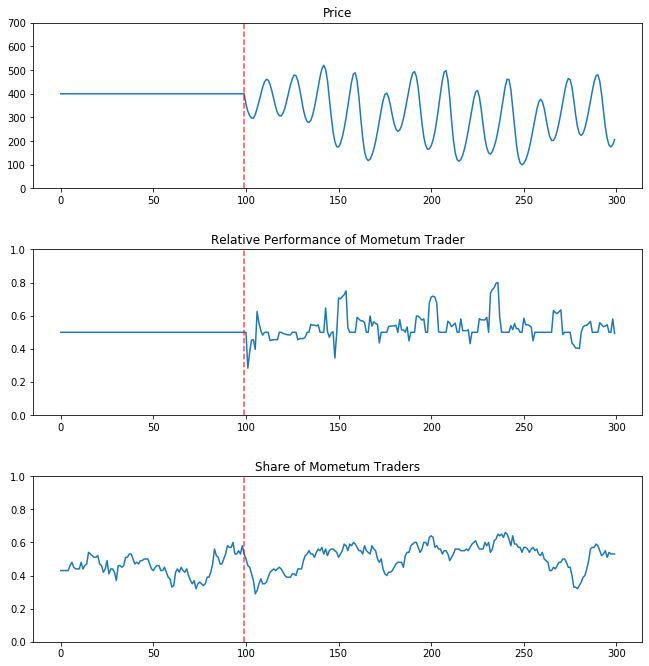

In [5]:
exogenous = np.append(np.full(100, 10.0), np.full(899,9.0)) # This is the sequence of exogenous demand

re = RealEstate(totalIterations=300, E=exogenous, ε=np.full(999, 0.4), η=np.full(999, 2))

plot()

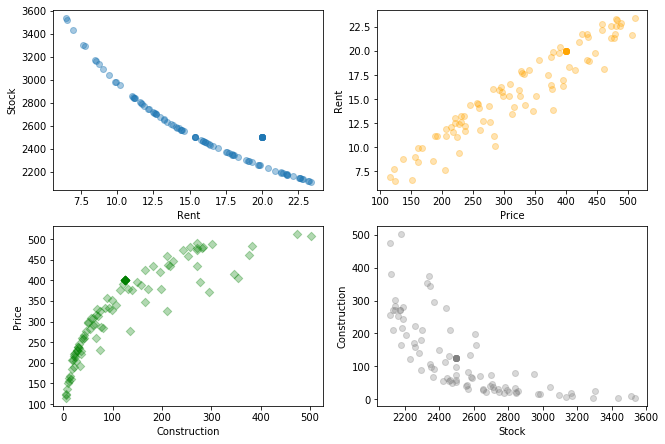

In [7]:
plt.subplot(221)
plt.scatter(re.R[0:re.totalIterations],re.S[0:re.totalIterations], marker='o', alpha=0.4)
plt.xlabel("Rent")
plt.ylabel("Stock")

plt.subplot(222)
plt.scatter(re.P[0:re.totalIterations], re.R[0:re.totalIterations], marker='o', color="orange", alpha=0.3)
plt.xlabel("Price")
plt.ylabel("Rent")


plt.subplot(223)
plt.scatter(re.C[0:re.totalIterations], re.P[0:re.totalIterations], marker='D', color="green", alpha=0.3)
plt.xlabel("Construction")
plt.ylabel("Price")

plt.subplot(224)
plt.scatter(re.S[0:re.totalIterations], re.C[0:re.totalIterations], marker='o', color="grey", alpha=0.3)
plt.xlabel("Stock")
plt.ylabel("Construction")

plt.subplots_adjust(top=1.5, right=1.5)

### Experiment 1)
#### Increasing Price Elasticity of Supply linearly to have Price = 360 at T = 10
#### Then introduce a -1 exogenous shock with discontinued policy

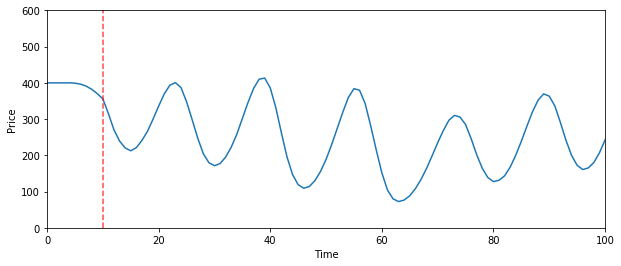

In [8]:
timeOfShock = 11
totalIterations=150

exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))

supplyElasticity  = np.full(timeOfShock, 2.0)
for i in range(len(supplyElasticity)-1): supplyElasticity[i+1] = supplyElasticity[i]+0.00856396484375
supplyElasticity = np.append(supplyElasticity, np.full(899,supplyElasticity[timeOfShock-1]))
    
re = RealEstate(totalIterations=totalIterations, E=exogenous, η=supplyElasticity)

plt.figure(figsize=(10,4))
plt.plot(re.P[0:re.totalIterations])
plt.xlabel("Time")
plt.ylabel("Price")
plt.ylim([0, 600])
plt.xlim([0, 100])
plt.axvline(x=10, color="red", alpha=0.7, linestyle='dashed')

plt.show()

### Experiment 2)
#### Increasing Price Elasticity of Demand in a linear way to have P = 360 at T=10 in baseline model
#### Then introduce a -1 exogenous shock at T=10 with discontinued policy

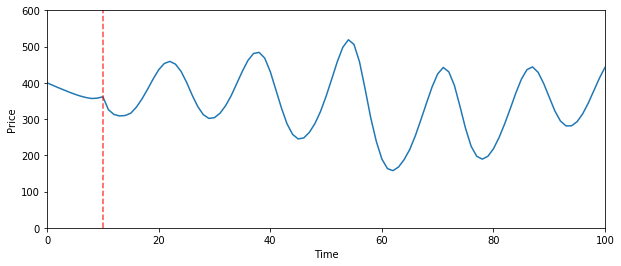

In [10]:
timeOfShock = 11
totalIterations=900

exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))

demandElasticity  = np.full(timeOfShock, 0.4)
for i in range(len(demandElasticity)-1): demandElasticity[i+1] = demandElasticity[i]+0.0022812500000000003
demandElasticity = np.append(demandElasticity, np.full(899,demandElasticity[timeOfShock-1]))


re = RealEstate(totalIterations=totalIterations, E=exogenous, ε=demandElasticity)

plt.figure(figsize=(10,4))
plt.plot(re.P[0:re.totalIterations])
plt.xlabel("Time")
plt.ylabel("Price")
plt.ylim([0, 600])
plt.xlim([0, 100])
plt.axvline(x=10, color="red", alpha=0.7, linestyle='dashed')

plt.show()

### Experiment 3)
#### Increasing Interest rate in a convex way to have Price equal 360 at T = 10
#### Then introduce a -1 exogenous shock with discontinued policy

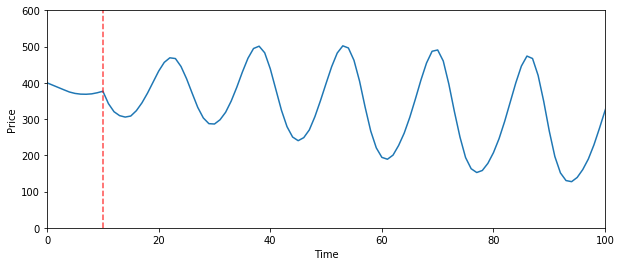

In [12]:
timeOfShock = 11
totalIterations=150

exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))

interestRate = np.full(timeOfShock,0.05) 
for i in range(len(interestRate)-1): interestRate[i+1] = interestRate[i]*1.0164550781250001
interestRate = np.append(interestRate, np.full(899,interestRate[timeOfShock-1]))

re = RealEstate(totalIterations=totalIterations, E=exogenous, r=interestRate)


plt.figure(figsize=(10,4))
plt.plot(re.P[0:re.totalIterations])
plt.xlabel("Time")
plt.ylabel("Price")
plt.ylim([0, 600])
plt.xlim([0, 100])
plt.axvline(x=10, color="red", alpha=0.7, linestyle='dashed')

plt.show()

### Regression Analysis to Estimate Post Shock Normalized Price Standard Deviation from Various Policies

#### Regression comparing Normalized Standard Deviation

In [ ]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITHOUT POLICY
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_no_policy = np.array([])

for a in range(num_simulations):
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))  
    
    re = RealEstate(totalIterations=end_T, E=exogenous)
    
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_no_policy = np.append(recorded_normalized_std_no_policy, np.std(normalized))

In [ ]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH ELASTICITY OF SUPPLY POLICY
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_1 = np.array([])

for a in range(num_simulations):
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))      
    
    supplyElasticity = np.full(timeOfShock, 2.0)
    for i in range(len(supplyElasticity)-1): supplyElasticity[i+1] = supplyElasticity[i]+0.00856396484375
    supplyElasticity = np.append(supplyElasticity, np.full(899,supplyElasticity[timeOfShock-1]))
    
    re = RealEstate(totalIterations=end_T, E=exogenous, η=supplyElasticity)
    
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_1 = np.append(recorded_normalized_std_1, np.std(normalized))

In [ ]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH ELASTICITY OF DEMAND POLICY
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_2 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    demandElasticity = np.full(timeOfShock, 0.4)
    for i in range(len(demandElasticity)-1): demandElasticity[i+1] = demandElasticity[i]+0.0022812500000000003
    demandElasticity = np.append(demandElasticity, np.full(899,demandElasticity[timeOfShock-1]))
    
    re = RealEstate(totalIterations=end_T, E=exogenous, ε=demandElasticity)
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_2 = np.append(recorded_normalized_std_2, np.std(normalized))

In [ ]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH INTEREST RATE POLICY
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_3 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    interestRate = np.full(timeOfShock,0.05) 
    for i in range(len(interestRate)-1): interestRate[i+1] = interestRate[i]*1.0164550781250001
    interestRate = np.append(interestRate, np.full(899,interestRate[timeOfShock-1]))

    re = RealEstate(totalIterations=end_T, E=exogenous, r=interestRate)
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_3 = np.append(recorded_normalized_std_3, np.std(normalized))

In [14]:
no_policy = np.column_stack((recorded_normalized_std_no_policy,np.full(1000,1),np.full(1000,0),np.full(1000,0),np.full(1000,0)))
_1 = np.column_stack((recorded_normalized_std_1,np.full(1000,0),np.full(1000,1),np.full(1000,0),np.full(1000,0)))
_2 = np.column_stack((recorded_normalized_std_2,np.full(1000,0),np.full(1000,0),np.full(1000,1),np.full(1000,0)))
_3 = np.column_stack((recorded_normalized_std_3,np.full(1000,0),np.full(1000,0),np.full(1000,0),np.full(1000,1)))

data = np.vstack((no_policy,_1,_2,_3))
df = pd.DataFrame(data, columns=["Std. Dev.","No Policy","Change η", "Change ε","Change r"])

X = df[["Change η","Change ε","Change r"]]
Y = df[["Std. Dev."]]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Std. Dev.   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     809.7
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:52:44   Log-Likelihood:                 6949.4
No. Observations:                4000   AIC:                        -1.389e+04
Df Residuals:                    3996   BIC:                        -1.387e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3333      0.001    247.384      0.0

/Users/ericostring/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Running A Regression to Estimate Post Shock Normalized Price Standard Deviation from different vales of $ m $

In [15]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH M=2
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_1_2 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    re = RealEstate(totalIterations=end_T, E=exogenous, m=2)
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_1_2 = np.append(recorded_normalized_std_1_2, np.std(normalized))

In [16]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH M=5
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_2_2 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    re = RealEstate(totalIterations=end_T, E=exogenous, m=5)
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_2_2 = np.append(recorded_normalized_std_2_2, np.std(normalized))

In [17]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH M=20
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_3_2 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    re = RealEstate(totalIterations=end_T, E=exogenous, m=20)
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_3_2 = np.append(recorded_normalized_std_3_2, np.std(normalized))

In [18]:
_1_2 = np.column_stack((recorded_normalized_std_1_2,np.full(1000,1),np.full(1000,0),np.full(1000,0)))
_2_2 = np.column_stack((recorded_normalized_std_2_2,np.full(1000,0),np.full(1000,1),np.full(1000,0)))
_3_2 = np.column_stack((recorded_normalized_std_3_2,np.full(1000,0),np.full(1000,0),np.full(1000,1)))

data = np.vstack((_1_2,_2_2,_3_2))
df = pd.DataFrame(data, columns=["Std. Dev.","M=2", "M=5", "M=20"])

X = df[["M=5", "M=20"]]
Y = df[["Std. Dev."]]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Std. Dev.   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 1.992e+04
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:54:23   Log-Likelihood:                 6032.5
No. Observations:                3000   AIC:                        -1.206e+04
Df Residuals:                    2997   BIC:                        -1.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1920      0.001    187.304      0.0

### Running A Regression to Estimate Post Shock Normalized Price Standard Deviation from different vales of EoS and EoD

In [19]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH EOD=0.4, EOS=2.0
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_1_3 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    re = RealEstate(totalIterations=end_T, E=exogenous, ε=np.full(999, 0.4),η=np.full(999, 2.0))
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_1_3 = np.append(recorded_normalized_std_1_3, np.std(normalized))

In [20]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH EOD=1.0, EOS=1.0
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_2_3 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    re = RealEstate(totalIterations=end_T, E=exogenous, ε=np.full(999, 1.0),η=np.full(999, 1.0))
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_2_3 = np.append(recorded_normalized_std_2_3, np.std(normalized))

In [21]:
# FIND THE NORMALIZED STD IN PRICE AFTER NEGATIVE EXOGENOUS SHOCK IN MODEL WITH EOD=0.2, EOS=2.2
timeOfShock = 11
end_T = 100
num_simulations = 1000
recorded_normalized_std_3_3 = np.array([])

for a in range(num_simulations):    
    exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))    
    
    re = RealEstate(totalIterations=end_T, E=exogenous, ε=np.full(999, 0.2),η=np.full(999, 2.2))
        
    normalized = re.P[timeOfShock:end_T]/np.mean(re.P[timeOfShock:end_T])
    recorded_normalized_std_3_3 = np.append(recorded_normalized_std_3_3, np.std(normalized))

In [22]:
_1_3 = np.column_stack((recorded_normalized_std_1_3,np.full(1000,1),np.full(1000,0),np.full(1000,0)))
_2_3 = np.column_stack((recorded_normalized_std_2_3,np.full(1000,0),np.full(1000,1),np.full(1000,0)))
_3_3 = np.column_stack((recorded_normalized_std_3_3,np.full(1000,0),np.full(1000,0),np.full(1000,1)))

data = np.vstack((_1_3,_2_3,_3_3))
df = pd.DataFrame(data, columns=["Std. Dev.","EOD=0.4, EOS=2.0", "EOD=1.0, EOS=1.0", "EOD=0.2, EOS=2.2"])

X = df[["EOD=1.0, EOS=1.0", "EOD=0.2, EOS=2.2"]]
Y = df[["Std. Dev."]]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Std. Dev.   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 3.382e+04
Date:                Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:56:02   Log-Likelihood:                 2023.4
No. Observations:                3000   AIC:                            -4041.
Df Residuals:                    2997   BIC:                            -4023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3318      0.004  

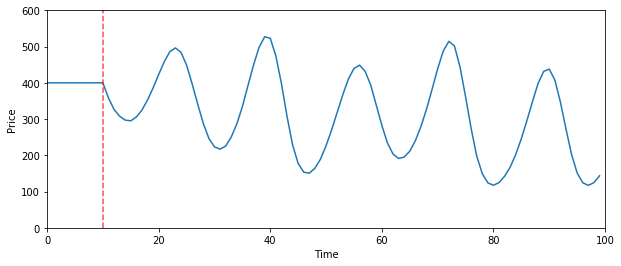

In [23]:
timeOfShock = 11
totalIterations=100

exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))
    
re = RealEstate(totalIterations=totalIterations, E=exogenous, ε=np.full(999, 0.4),η=np.full(999, 2.0))

plt.figure(figsize=(10,4))
plt.plot(re.P[0:re.totalIterations])
plt.xlabel("Time")
plt.ylabel("Price")
plt.ylim([0, 600])
plt.xlim([0, 100])
plt.axvline(x=10, color="red", alpha=0.7, linestyle='dashed')

plt.show()

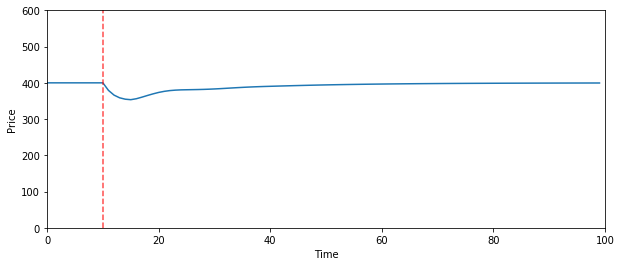

In [24]:
timeOfShock = 11
totalIterations=100

exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))
    
re = RealEstate(totalIterations=totalIterations, E=exogenous, ε=np.full(999, 1.0),η=np.full(999, 1.0))

plt.figure(figsize=(10,4))
plt.plot(re.P[0:re.totalIterations])
plt.xlabel("Time")
plt.ylabel("Price")
plt.ylim([0, 600])
plt.xlim([0, 100])
plt.axvline(x=10, color="red", alpha=0.7, linestyle='dashed')

plt.show()

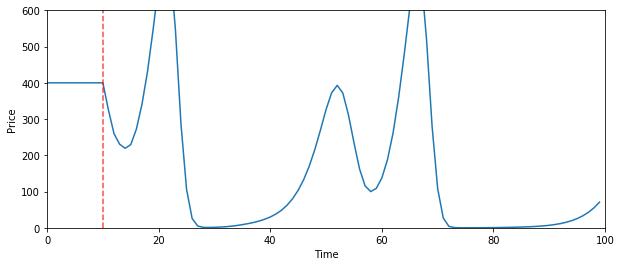

In [25]:
timeOfShock = 11
totalIterations=100

exogenous = np.append(np.full(timeOfShock, 10.0), np.full(899,9.0))
    
re = RealEstate(totalIterations=totalIterations, E=exogenous, ε=np.full(999, 0.2),η=np.full(999, 2.2))

plt.figure(figsize=(10,4))
plt.plot(re.P[0:re.totalIterations])
plt.xlabel("Time")
plt.ylabel("Price")
plt.ylim([0, 600])
plt.xlim([0, 100])
plt.axvline(x=10, color="red", alpha=0.7, linestyle='dashed')

plt.show()